# 📊 Projeto de Manipulação e Análise de Dados



📅 Contexto do Projeto

Este projeto tem como objetivo realizar a limpeza, transformação e padronização de dados de uma base de vendas no varejo, com vistas a previsões de demanda e outras análises exploratórias.

Fonte dos dados: Kaggle - Sample Sales Data https://www.kaggle.com/datasets/kyanyoga/sample-sales-data


In [1]:
# 🧰 Importação de Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 📂 1. Leitura e Exploração

In [2]:
# 🧰 Carregue o arquivo CSV (importar o arquivo sales_data_sample)
df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')
# Corrigido erro de codificação ao ler o CSV, usando encoding='latin1' no lugar do padrão UTF-8.

pd.set_option('display.max_columns', None)  # Mostrar todas as colunas

# 🧰 Pré-processamento necessário para converter o texo de ORDERDATE em data
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

#🧰 Visualizar as 5 primeiras linhas
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
# 🧰 Mostre o nome das colunas, a quantidade de linhas/colunas e tipos de dados detectados pelo pandas (.dtypes)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [4]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


#🔍  Informações Gerais do DataFrame
Panorama:

  Total de Linhas   = 2823                                               
  Total de Colunas  = 25                                                 
  Tipos de Dados    = `int64`, `float64`, `object`                       
  Uso de Memória    = \~551.5 KB                                         
  Colunas com Nulos = `ADDRESSLINE2`, `STATE`, `POSTALCODE`, `TERRITORY`

#  Estrutura Geral
- Numéricas (int64, float64): 9 colunas
Ex.: QUANTITYORDERED, PRICEEACH, SALES, MSRP, ORDERNUMBER

- Categóricas/Textuais (object): 16 colunas
Ex.: ORDERDATE, STATUS, PRODUCTLINE, CUSTOMERNAME, COUNTRY

#   Observações sobre Valores Nulos
| Coluna         | Valores Faltando | % de Dados Faltando | Observação                   |
| -------------- | ---------------- | ------------------- | ---------------------------- |
| `ADDRESSLINE2` | 2521             | \~89%               | Pode remover (quase vazio)   |
| `STATE`        | 1486             | \~53%               | Avaliar se é útil ou remover |
| `POSTALCODE`   | 76               | \~2.7%              | Pode preencher ou remover    |
| `TERRITORY`    | 1074             | \~38%               | Avaliar caso a caso          |



#📌 Conclusão para o Relatório
O DataFrame está bem estruturado, com 2823 registros e 25 colunas. Algumas colunas possuem valores ausentes em grande volume (ADDRESSLINE2, STATE, TERRITORY) e devem ser avaliadas para exclusão ou preenchimento. A coluna ORDERDATE precisa ser convertida para tipo datetime.

1. Considerações para Tratamento de Dados

- Remover ADDRESSLINE2


    df.drop(columns=['ADDRESSLINE2'], inplace=True)
    

- Preencher POSTALCODE com 'Unknown' ou NaN (se for string):


    df['POSTALCODE'].fillna('Unknown', inplace=True)


- Preencher STATE e TERRITORY com 'Not Informed' (ou analisar por país):


    df['STATE'].fillna('Not Informed', inplace=True)

    df['TERRITORY'].fillna('Not Informed', inplace=True)


2. Colunas que Precisam de Correção de Tipo

- ORDERDATE está como texto (object), mas deveria ser datetime


    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


- POSTALCODE pode estar como texto, mas pode deixar como string (categorical) se não for usar como número


    df['POSTALCODE'] = df['POSTALCODE'].astype(str)


# 🧮 2. Listas, Dicionários e Tuplas

In [5]:
# 🧰 Extrair coluna de interesse em uma lista e imprimir com loop
customer_names = df['CUSTOMERNAME'].tolist()
for i, name in enumerate(customer_names[:5]):
    print(f"Cliente {i+1}: {name}")


Cliente 1: Land of Toys Inc.
Cliente 2: Reims Collectables
Cliente 3: Lyon Souveniers
Cliente 4: Toys4GrownUps.com
Cliente 5: Corporate Gift Ideas Co.


In [6]:
# 🧰 Criar dicionario produto:linha
produto_linha = dict(zip(df['PRODUCTCODE'], df['PRODUCTLINE']))
for i, (produto, linha) in enumerate(produto_linha.items()):
    if i >= 3:
        break
    print(f"Produto: {produto} -> Linha: {linha}")

Produto: S10_1678 -> Linha: Motorcycles
Produto: S10_1949 -> Linha: Classic Cars
Produto: S10_2016 -> Linha: Motorcycles


In [7]:
# 🧰 Criar tupla com informacoes de uma linha
tupla_info = tuple(df.loc[0, ['CUSTOMERNAME', 'COUNTRY', 'SALES']])
print("Tupla de informacoes:", tupla_info)

Tupla de informacoes: ('Land of Toys Inc.', 'USA', np.float64(2871.0))


#🎯 4. Estrutura de Controle e Operações

In [8]:
# 🧰 Estrutura condicional com SALES
valor = df.loc[0, 'SALES']
if valor > 5000:
    print("Venda muito alta")
elif valor > 2000:
    print("Venda razoável")
else:
    print("Venda baixa")

Venda razoável


In [9]:
# 🧰For para somar os primeiros 5 valores de SALES
soma = 0
for val in df['SALES'][:5]:
    soma += val
print("Soma dos 5 primeiros valores de SALES:", soma)

Soma dos 5 primeiros valores de SALES: 18473.21


In [10]:
# 🧰 While para encontrar primeiro valor de SALES > 5000
i = 0
while i < len(df):
    if df.loc[i, 'SALES'] > 5000:
        print("Primeiro valor > 5000:", df.loc[i, 'SALES'])
        break
    i += 1

Primeiro valor > 5000: 5205.27


In [11]:
# 🧰 Operacoes aritmeticas (nova coluna)
# Criar nova coluna com preco total calculado
# Total calculado = QUANTITYORDERED * PRICEEACH
df['TOTAL_CALCULADO'] = df['QUANTITYORDERED'] * df['PRICEEACH']
print(df['TOTAL_CALCULADO'].head().to_markdown())


|    |   TOTAL_CALCULADO |
|---:|------------------:|
|  0 |           2871    |
|  1 |           2765.9  |
|  2 |           3884.34 |
|  3 |           3746.7  |
|  4 |           4900    |


In [12]:
df.loc[0]           # Primeira linha
df.iloc[0:5]        # Primeiras 5 linhas

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,TOTAL_CALCULADO
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2871.00
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2765.90
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,3746.70
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,4900.00


# 📊 5. NumPy e Arrays Numericos

In [13]:
# 🧰 Criar array a partir de SALES
sales_array = np.array(df['SALES'])

# 🧰 Operacoes vetorizadas

print("Vendas + 10:", sales_array[:5] + 10)
print("Vendas x 2:", sales_array[:5] * 2)

Vendas + 10: [2881.   2775.9  3894.34 3756.7  5215.27]
Vendas x 2: [ 5742.    5531.8   7768.68  7493.4  10410.54]


In [14]:
# 🧰 Fatiamento e indexacao (acessar, modificar e exibir partes do array)
print("Primeiros 3 elementos:", sales_array[:3])
sales_array[0] = 9999
print("Novo primeiro elemento alterado:", sales_array[:3])

Primeiros 3 elementos: [2871.   2765.9  3884.34]
Novo primeiro elemento alterado: [9999.   2765.9  3884.34]


In [15]:
# 🧰 Operacao agregada
print("Media das vendas:", sales_array.mean())

Media das vendas: 3556.414045341835


#🔁 6. MANIPULAÇÃO DOS DADOS

In [16]:
# 🧰 Selecao com loc e condicoes
#print(df.loc[0])
print(df.loc[df['COUNTRY'] == 'USA'].head(10).to_markdown())

|    |   ORDERNUMBER |   QUANTITYORDERED |   PRICEEACH |   ORDERLINENUMBER |   SALES | ORDERDATE           | STATUS   |   QTR_ID |   MONTH_ID |   YEAR_ID | PRODUCTLINE   |   MSRP | PRODUCTCODE   | CUSTOMERNAME             |      PHONE | ADDRESSLINE1              | ADDRESSLINE2   | CITY          | STATE   |   POSTALCODE | COUNTRY   |   TERRITORY | CONTACTLASTNAME   | CONTACTFIRSTNAME   | DEALSIZE   |   TOTAL_CALCULADO |
|---:|--------------:|------------------:|------------:|------------------:|--------:|:--------------------|:---------|---------:|-----------:|----------:|:--------------|-------:|:--------------|:-------------------------|-----------:|:--------------------------|:---------------|:--------------|:--------|-------------:|:----------|------------:|:------------------|:-------------------|:-----------|------------------:|
|  0 |         10107 |                30 |       95.7  |                 2 | 2871    | 2003-02-24 00:00:00 | Shipped  |        1 |          2 |      2003 

In [17]:
# 🧰 Agregação simples com a Media das vendas
print("Media de vendas por ano:")
print(df.groupby('YEAR_ID')['SALES'].mean().to_markdown())

Media de vendas por ano:
|   YEAR_ID |   SALES |
|----------:|--------:|
|      2003 | 3516.98 |
|      2004 | 3512.39 |
|      2005 | 3747.88 |


In [18]:
# 🧰 Analise agregada com value_counts e groupby
print("Contagem por DEALSIZE:")
print(df['DEALSIZE'].value_counts().to_markdown())

Contagem por DEALSIZE:
| DEALSIZE   |   count |
|:-----------|--------:|
| Medium     |    1384 |
| Small      |    1282 |
| Large      |     157 |


#📈 7. Gráficos

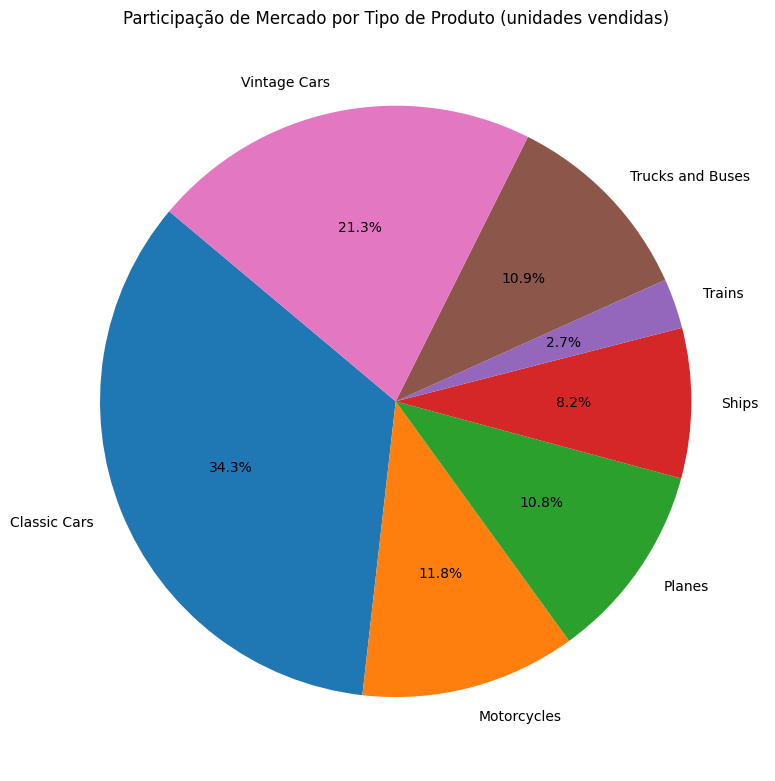

In [19]:
# Gráfico de Pizza
LINHA_PRODUTO = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum()
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(LINHA_PRODUTO, labels=LINHA_PRODUTO.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Participação de Mercado por Tipo de Produto (unidades vendidas)')
plt.tight_layout()
plt.show()

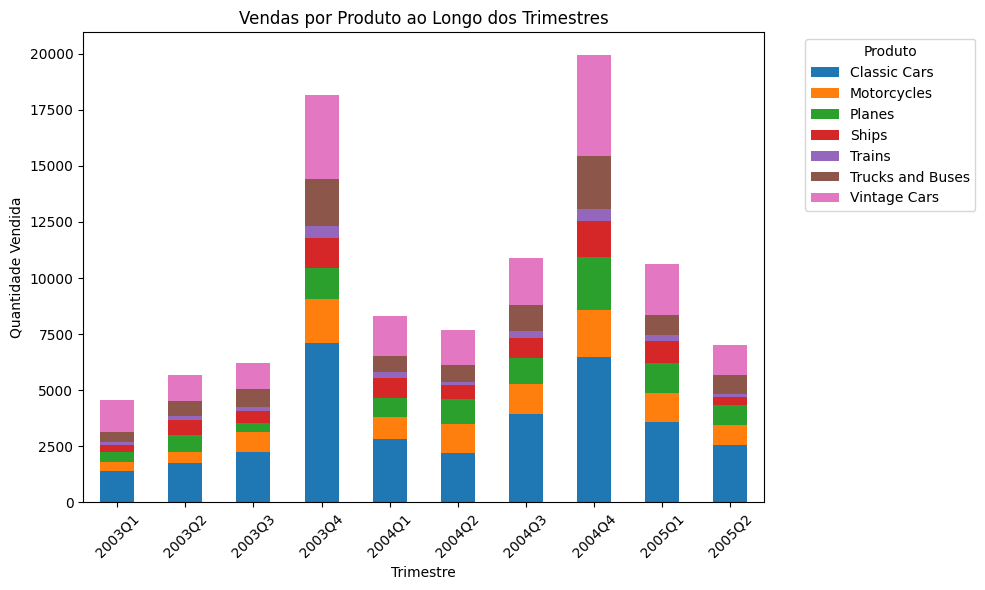

In [20]:
# Grafico Agrupado por trimestre e produto
df['QUARTER'] = df['ORDERDATE'].dt.to_period('Q')
vendas_trimestrais = df.groupby(['QUARTER', 'PRODUCTLINE'])['QUANTITYORDERED'].sum().unstack()

fig2, ax2 = plt.subplots(figsize=(10, 6))
vendas_trimestrais.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Vendas por Produto ao Longo dos Trimestres')
ax2.set_xlabel('Trimestre')
ax2.set_ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

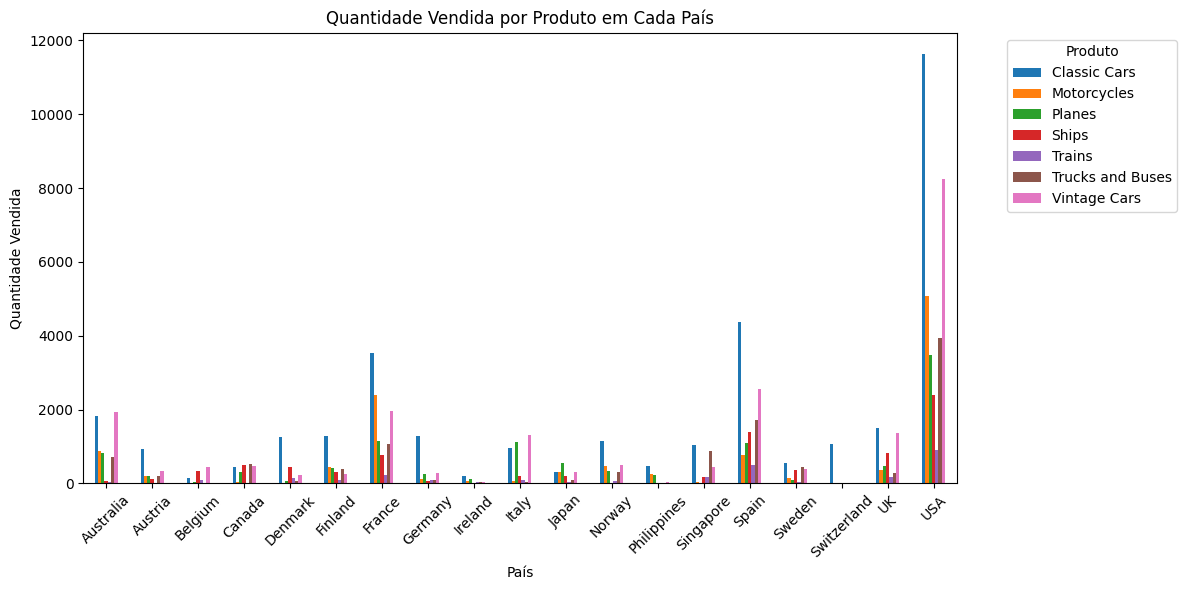

In [21]:
# Gráfico Agrupado por país e produto
vendas_pais_produto = df.groupby(['COUNTRY', 'PRODUCTLINE'])['QUANTITYORDERED'].sum().unstack()

fig3, ax3 = plt.subplots(figsize=(12, 6))
vendas_pais_produto.plot(kind='bar', stacked=False, ax=ax3)
ax3.set_title('Quantidade Vendida por Produto em Cada País')
ax3.set_xlabel('País')
ax3.set_ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


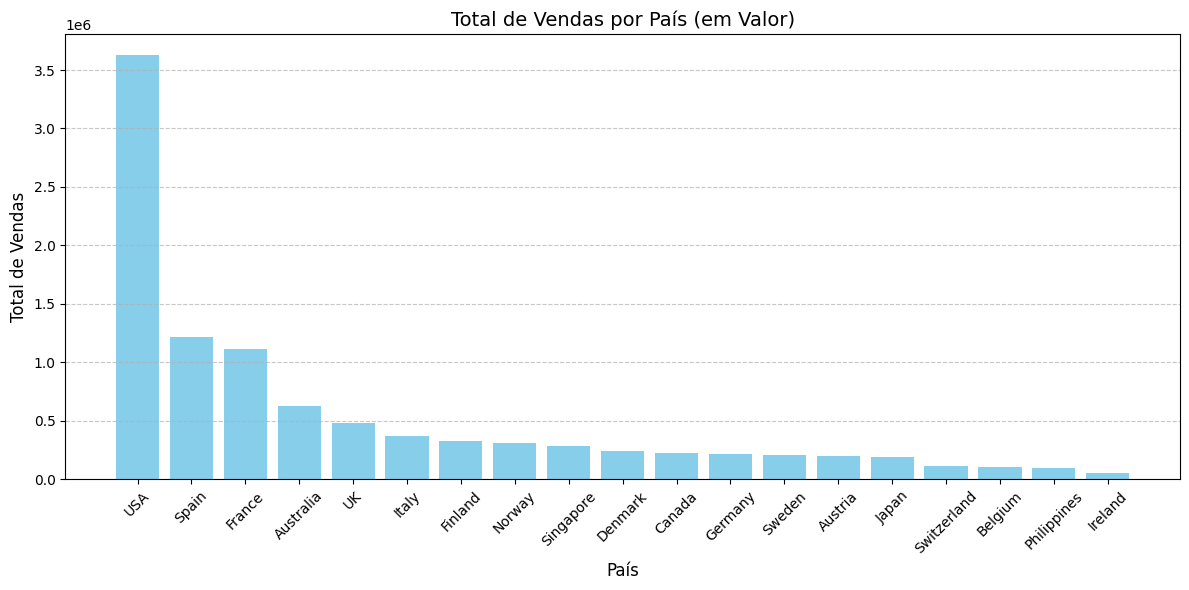

In [22]:
# Gráfico de Total de vendas por país (em barras)
vendas_totais_pais = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)

fig4, ax4 = plt.subplots(figsize=(12, 6))  # Tamanho ajustado para caber os países

ax4.bar(vendas_totais_pais.index, vendas_totais_pais.values, color='skyblue')

ax4.set_title('Total de Vendas por País (em Valor)', fontsize=14)
ax4.set_xlabel('País', fontsize=12)
ax4.set_ylabel('Total de Vendas', fontsize=12)

ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.tight_layout()
plt.show()




#📘 Relatório das Vendas

Análise baseada nos gráficos de vendas por produto, país, trimestre e valor total.

 Objetivo: Identificar padrões, oportunidades de mercado e áreas de melhoria.

---
#📌  Descobertas

📊 **Gráfico 1:** Participação de Mercado por Tipo de Produto
- Classic Cars dominam o mercado com folga.


- Cars e Motorcycles formam o segundo pelotão, com boa aceitação.


- Ships, Trains e Planes têm presença quase irrelevante.

 O portfólio tem um “core” forte em automóveis colecionáveis. Os demais produtos não têm tração comercial.

📊 **Gráfico 2:** Vendas por Produto ao Longo dos Trimestres
- Q2 (2º trimestre) e Q4 (4º trimestre) concentram os picos de vendas.


- “Classic Cars” mantém o protagonismo em todos os trimestres.


- Algumas linhas mostram estabilidade, outras caem drasticamente fora dos picos.

 Existe uma sazonalidade forte, com demanda crescendo em momentos estratégicos do ano, talvez por datas comemorativas, bônus ou sazonalidade de mercado.

📊 **Gráfico 3:** Quantidade Vendida por Produto em Cada País
- EUA, Alemanha e França lideram com grande vantagem.


-  Japão e Itália mostram vendas mais modestas, porém com foco em linhas específicas.


- A distribuição é desigual: alguns países compram de quase todas as linhas, outros só de uma ou duas.

 É preciso investir em marketing segmentado. O perfil de consumo varia muito por país. EUA são generalistas, enquanto outros países são especialistas.

📊 **Gráfico 4:** Participação de Vendas por País
- Os países que mais compram em valor não necessariamente compram mais em volume.


- Japão e Itália compram menos, mas compram produtos de maior valor.

Há países que são nichos premium. Não é só quantidade que importa, mas o ticket médio. Oportunidade clara para aplicar estratégias de luxo ou colecionadores.

---
#💡  Insights Estratégicos
 1. Investir nas linhas líderes (Classic & Vintage Cars): São os motores de receita. Merecem mais orçamento de marketing, P&D e estoque.

 2. Criar campanhas sazonais para Q2 e Q4: Esses trimestres devem ter reforço promocional, como lançamentos, descontos e bundles.

 3. Personalizar estratégias por país:

EUA → Marketing abrangente, alta variedade.


Japão e Itália → Produtos sofisticados e de luxo.



 4. Repensar produtos com vendas baixas:
 “Ships”, “Planes” e “Trains” talvez devam ser reposicionados ou descontinuados. Alternativa: lançar como edições limitadas ou kits especiais.

 5. Fortalecer mercados emergentes com alto valor médio:
 Um país que compra pouco, mas caro, é um ótimo alvo para estratégias de fidelização e exclusividade.
---
#🧠Conclusão Final
O negócio está fortemente ancorado em um pequeno grupo de produtos e mercados. Isso é bom, mas também os riscos estão concentrados.
 Com foco em:
Diversificação de linha


Expansão geográfica estratégica


Campanhas sazonais planejadas
 Além disso, ajustar os esforços de marketing e vendas com base no perfil de cada país e trimestre tornará o time mais eficiente e os resultados mais previsíveis.




